In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


# Перша частина

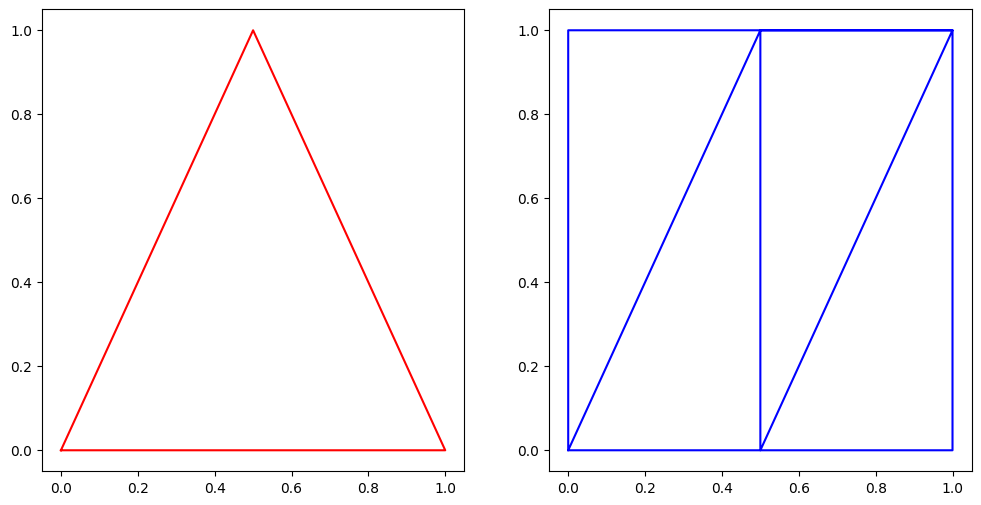

In [2]:
def draw_graphic(triangle, prizma):
    fig, (t_ax, p_ax) = plt.subplots(1, 2, figsize=(12, 6))
    t_ax.plot(triangle[:,0], triangle[:,1], 'r')
    p_ax.plot(prizma[:,0], prizma[:,1], 'b')
triangle = np.array([[0, 0], [1, 0], [0.5, 1], [0, 0]])
prizma = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0], [0.5, 1], [1, 1], [0.5, 0], [0.5, 1]])
draw_graphic(triangle, prizma)

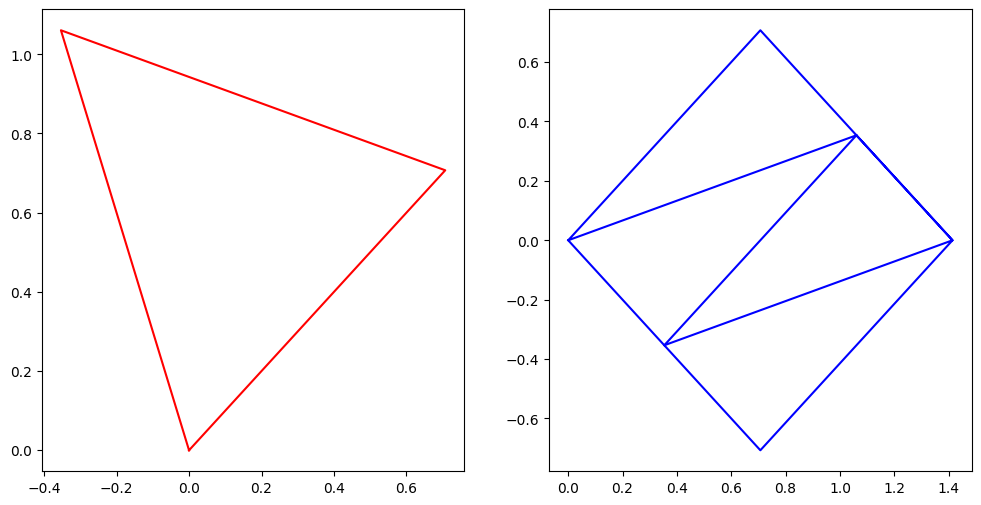

In [3]:
def rotate_object(obj, angle):
    angle_rad = np.radians(angle)
    
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])
    
    rotated_obj = np.dot(obj, rotation_matrix)
    
    return rotated_obj

draw_graphic(rotate_object(triangle, -45), rotate_object(prizma, 45))


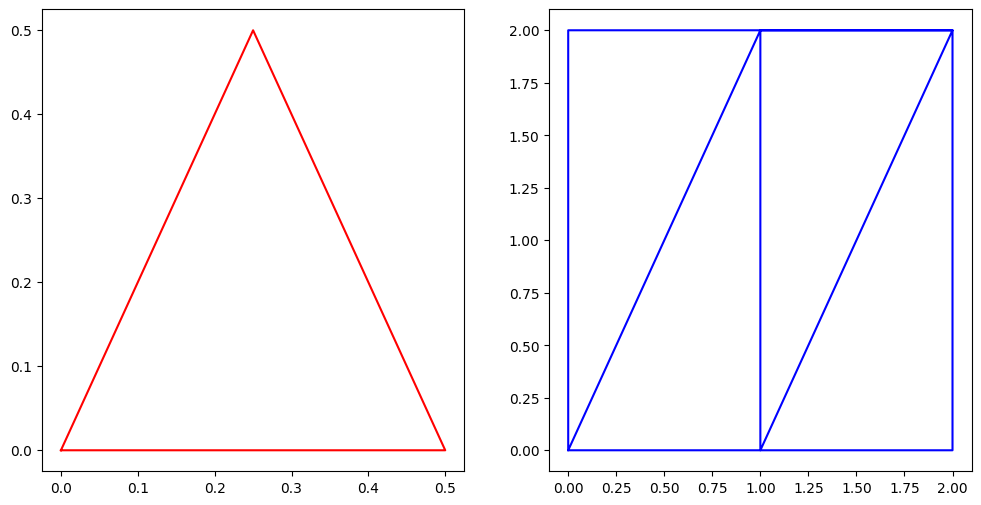

In [4]:
def scale_object(obj, scale: float):
    return scale * obj
draw_graphic(scale_object(triangle, 1/2), scale_object(prizma, 2))


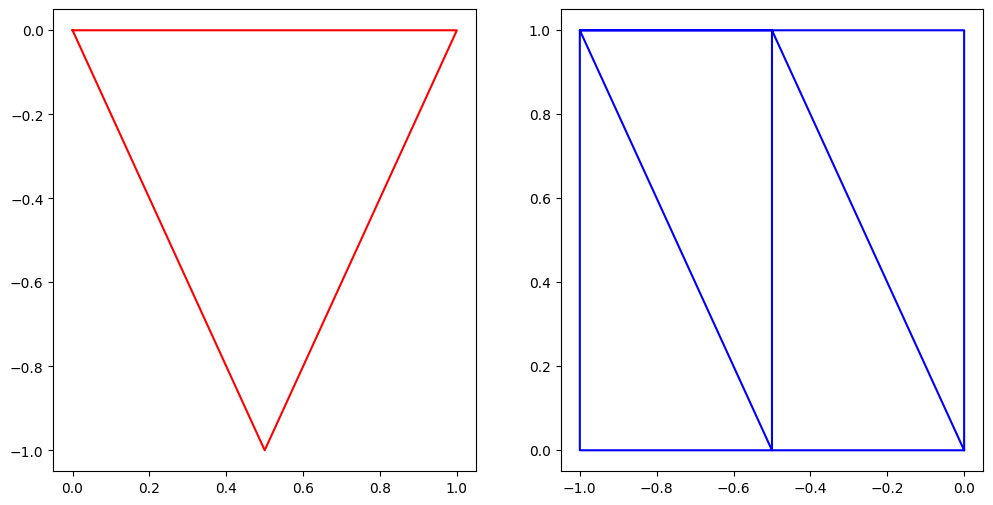

In [5]:
def mirror_object(obj, axis):
    if axis == 'x':
        mirror_matrix = np.array([[-1, 0],
                                  [0, 1]])
    elif axis == 'y':
        mirror_matrix = np.array([[1, 0],
                                  [0, -1]])
    mirrored_obj = np.dot(obj, mirror_matrix)
    
    return mirrored_obj
draw_graphic(mirror_object(triangle, 'y'), mirror_object(prizma, 'x'))

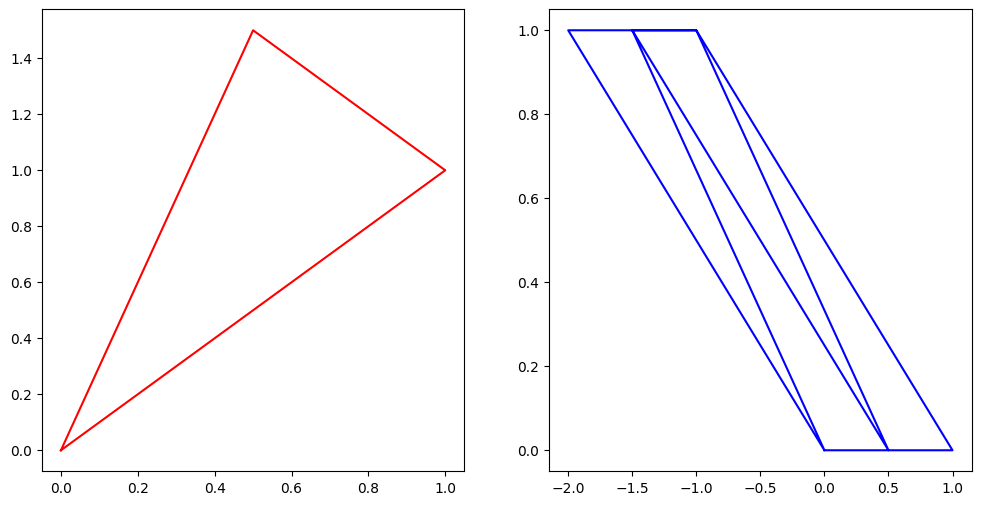

In [6]:
def slope_axis(obj, axis, coef):
    if axis == 'x':
        slope_matrix = np.array([[1, coef],
                                 [0, 1]])
    elif axis == 'y':
        slope_matrix = np.array([[1, 0],
                                 [coef, 1]])
    sloped_obj = np.dot(obj, slope_matrix)
    
    return sloped_obj
draw_graphic(slope_axis(triangle, 'x', 1), slope_axis(prizma, 'y',-2))

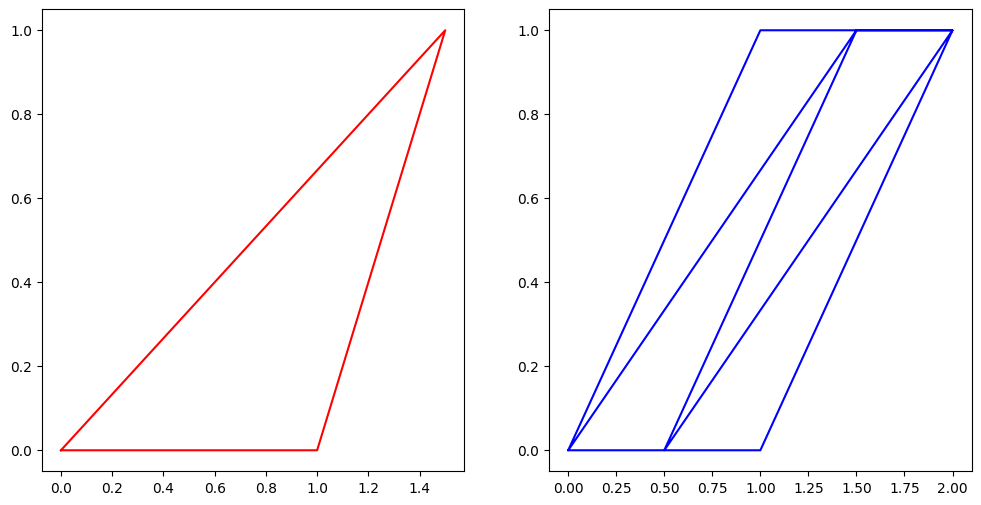

In [7]:
def universal_transform(obj, matrix):
    return np.dot(obj, matrix)
# matrix = np.array([[1, 0.5],
#                    [0.5, 1]])
matrix = np.array([[1, 0],
                   [1, 1]])
draw_graphic(universal_transform(triangle, matrix), universal_transform(prizma, matrix))

- Мінуси перед діагональними  елементами віддзеркалюють зображення відносно певної осі (x - $a_{11}$ y - $a_{22}$)
- Зміна діагональних елементів - розтягнення або стиснення в певній осі (x - $a_{11}$ y - $a_{22}$)
- Зміна елементів $a_{12}$ та $a_{21}$ нахиляє осі x та y відповідно

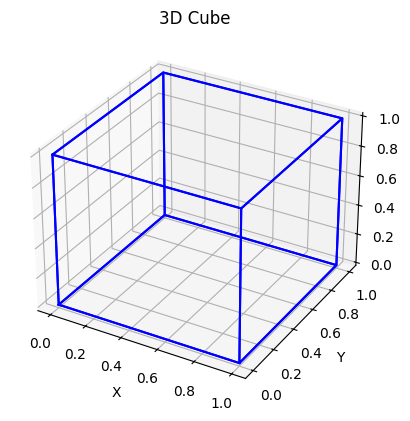

In [8]:
def draw_3d(obj):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for face in obj:
        x = face[:, 0]
        y = face[:, 1]
        z = face[:, 2]
        ax.plot(x, y, z, color='b')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Cube')
    plt.show()

cube = np.array([
    [[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 0]],  
    [[0, 0, 0], [1, 0, 0], [1, 0, 1], [0, 0, 1], [0, 0, 0]],  
    [[0, 0, 0], [0, 1, 0], [0, 1, 1], [0, 0, 1], [0, 0, 0]],  
    [[1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 0, 1], [1, 0, 0]],  
    [[0, 1, 0], [1, 1, 0], [1, 1, 1], [0, 1, 1], [0, 1, 0]],  
    [[0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 0, 1]],  
])

draw_3d(cube)


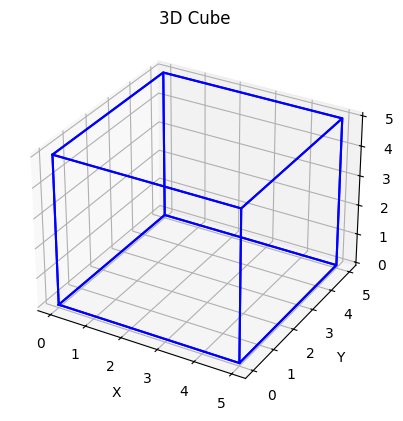

In [9]:
def scale_3d(obj, scale):
    return scale * obj
draw_3d(scale_3d(cube, 5))

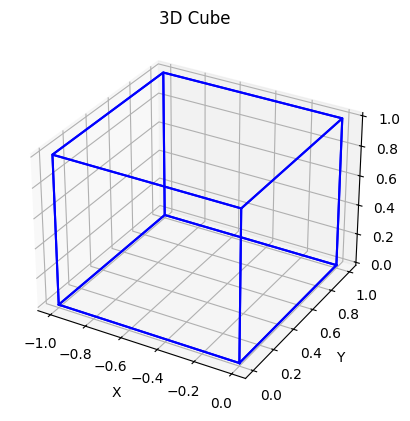

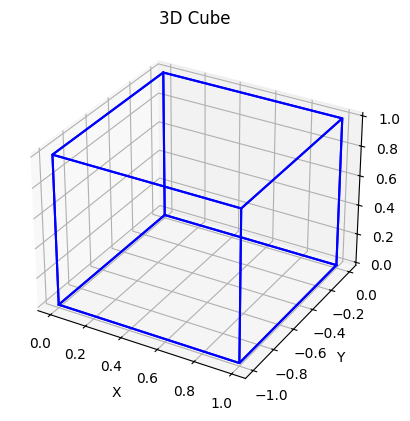

In [10]:
def mirror_3d(obj, axis):
    if axis == 'x':
        mirror_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    elif axis == 'y':
        mirror_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'z':
        mirror_matrix = np.array([[1, 0, 0], [0, 1, 0], [0, 0, -1]])
    return np.dot(obj, mirror_matrix)
draw_3d(mirror_3d(cube, 'x'))
draw_3d(mirror_3d(cube, 'y'))

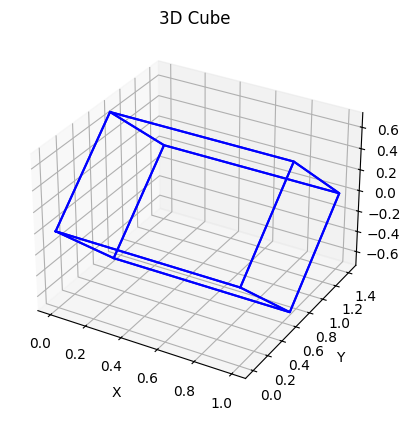

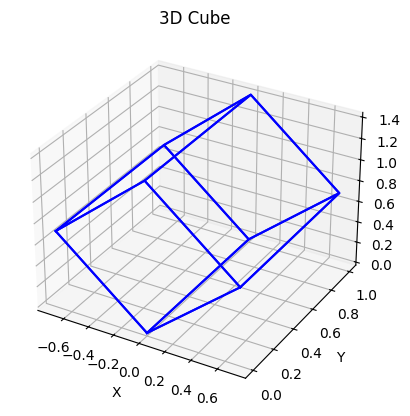

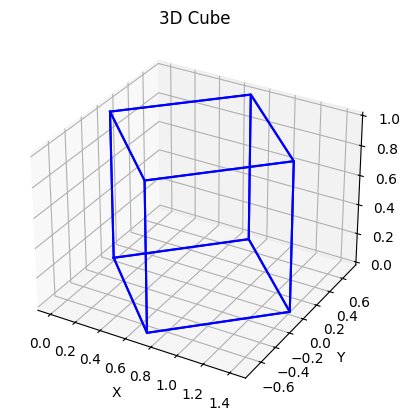

In [11]:
def rotate_3d(obj, axis, angle):
    angle = np.radians(angle)
    if axis == 'x':
        rotation_matrix = np.array([
            [1, 0, 0],
            [0, np.cos(angle), -np.sin(angle)],
            [0, np.sin(angle), np.cos(angle)]
        ])
    elif axis == 'y':
        rotation_matrix = np.array([
            [np.cos(angle), 0, np.sin(angle)],
            [0, 1, 0],
            [-np.sin(angle), 0, np.cos(angle)]
        ])
    elif axis == 'z':
        rotation_matrix = np.array([
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle), np.cos(angle), 0],
            [0, 0, 1]
        ])
    return np.dot(obj, rotation_matrix)
draw_3d(rotate_3d(cube, 'x', 45))
draw_3d(rotate_3d(cube, 'y', 45))
draw_3d(rotate_3d(cube, 'z', 45))


# Друга частина

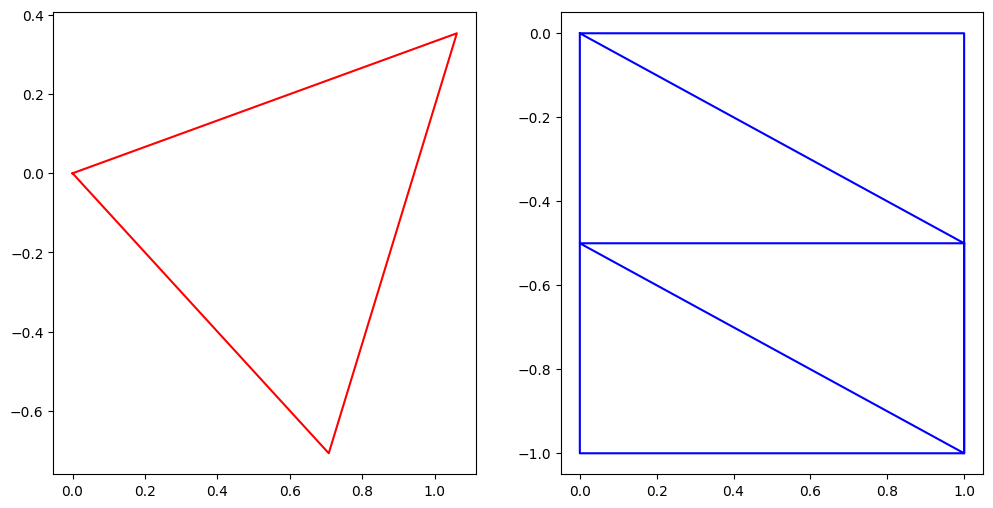

In [12]:
def rotate_cv2(obj, angle):
    rotation_matrix = cv2.getRotationMatrix2D((0, 0), angle, 1.0)
    rotated_object = cv2.transform(obj.reshape(-1, 1, 2), rotation_matrix)
    return rotated_object.squeeze()

draw_graphic(rotate_cv2(triangle, 45), rotate_cv2(prizma, 90))

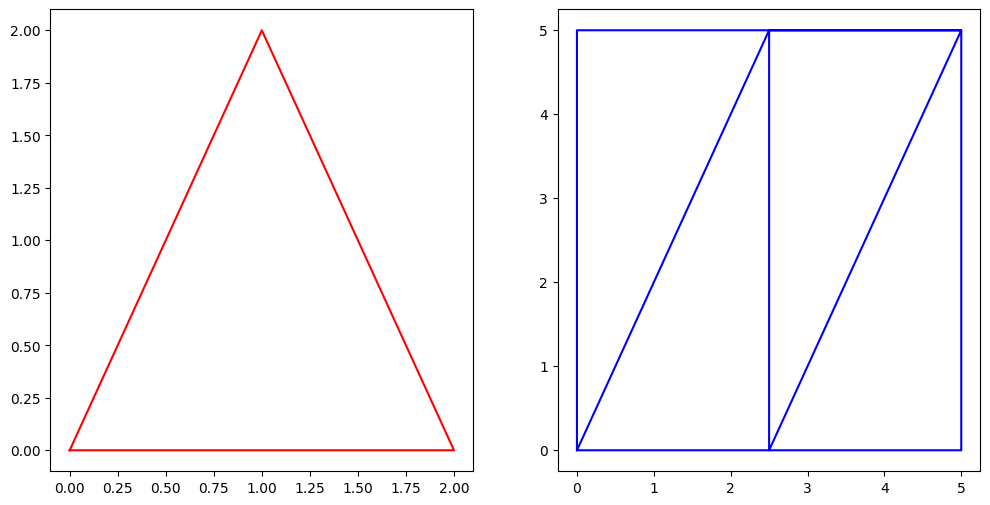

In [13]:
def scaling_cv2(obj, scale):
    scaling_matrix = np.array([
        [scale, 0],
        [0, scale]
    ])
    scaled_obj = cv2.transform(obj.reshape(-1, 1, 2), scaling_matrix)
    return scaled_obj.squeeze()
draw_graphic(scaling_cv2(triangle, 2), scaling_cv2(prizma, 5))

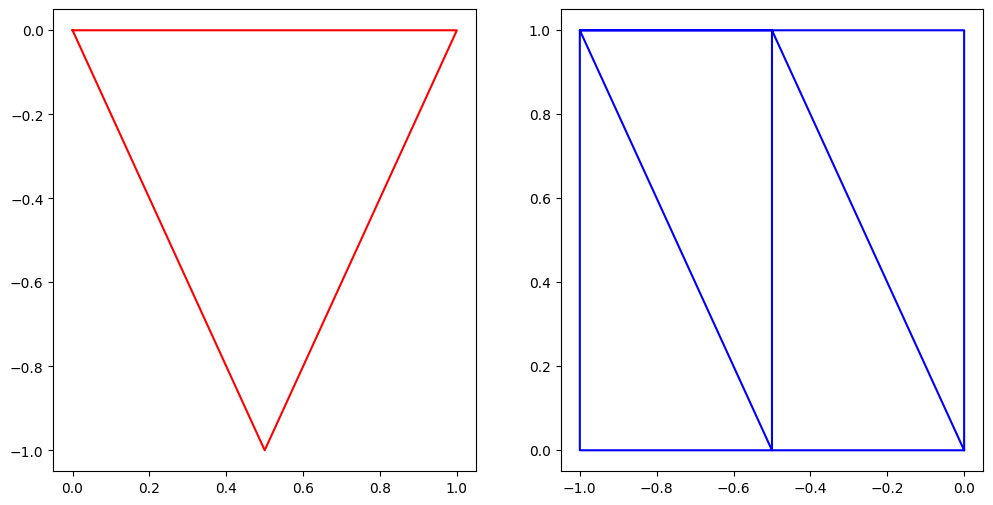

In [14]:
def mirror_cv2_obj(obj, axis):
    if axis == "y":
        mirroring_matrix = np.array([
            [1, 0],
            [0, -1]
        ], dtype=np.float32)
        obj = cv2.transform(obj.reshape(-1, 1, 2), mirroring_matrix)
    if axis == "x":
        mirroring_matrix = np.array([
            [-1, 0],
            [0, 1]
        ], dtype=np.float32)
        obj = cv2.transform(obj.reshape(-1, 1, 2), mirroring_matrix)
    return obj.squeeze()
draw_graphic(mirror_cv2_obj(triangle, 'y'), mirror_cv2_obj(prizma, 'x'))

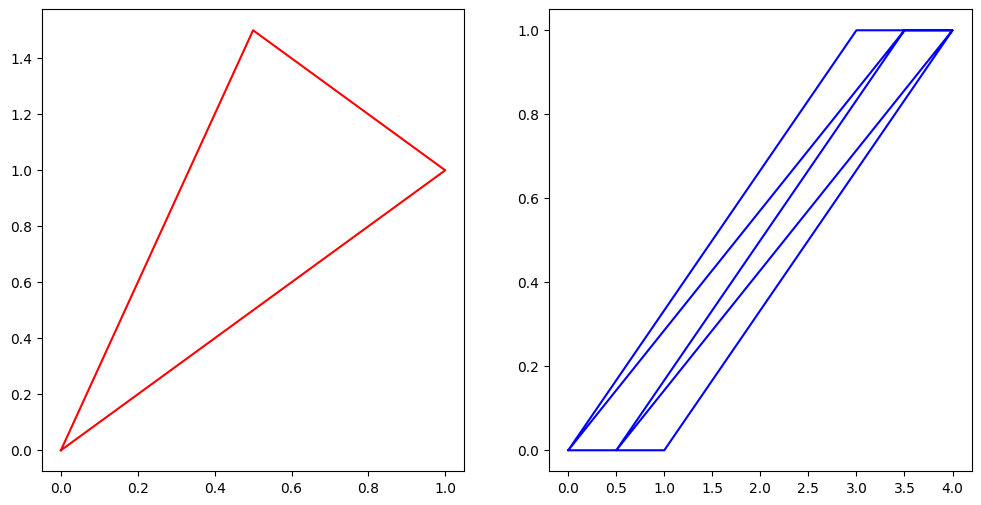

In [15]:
def slope_cv2(obj, slope, axis):
    if axis == "x":
        slope_matrix = np.array([
            [1, 0],
            [slope, 1]
        ], dtype=np.float32)
    if axis == "y":
        slope_matrix = np.array([
            [1, slope],
            [0, 1]
        ], dtype=np.float32)
    obj = cv2.transform(obj.reshape(-1, 1, 2), slope_matrix)
    return obj.squeeze()
draw_graphic(slope_cv2(triangle, 1, 'x'), slope_cv2(prizma, 3, 'y'))

In [4]:
image = cv2.imread('image.jpg')
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
def mirror_img(img, axis):
    if axis == "x":
        return cv2.flip(img, 0)
    if axis == "y":
        return cv2.flip(img, 1)
    if axis == "xy":
        return cv2.flip(img, -1)
cv2.imshow('image', mirror_img(image, 'xy'))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
def rotate_img(img, angle):
    rows, cols = img.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv2.warpAffine(img, rotation_matrix, (cols, rows))
cv2.imshow('image', rotate_img(image, -45))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:

def slope_img(img, slope, axis):
    rows, cols = img.shape[:2]
    if axis == "x":
        slope_matrix = np.float32([
            [1, 0, 0],
            [slope, 1, 0]
        ])
    if axis == "y":
        slope_matrix = np.float32([
            [1, slope, 0],
            [0, 1, 0]
        ])
    return cv2.warpAffine(img, slope_matrix, (cols, rows))
cv2.imshow('image', slope_img(image, 0.2, 'x'))
cv2.waitKey(0)
cv2.destroyAllWindows()

